Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 5)                 10        
                                                                 
 dense_4 (Dense)             (None, 3)                 18        
                                                                 
 dense_5 (Dense)             (None, 1)                 4         
                                                                 
Total params: 32 (128.00 Byte)
Trainable params: 32 (128.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


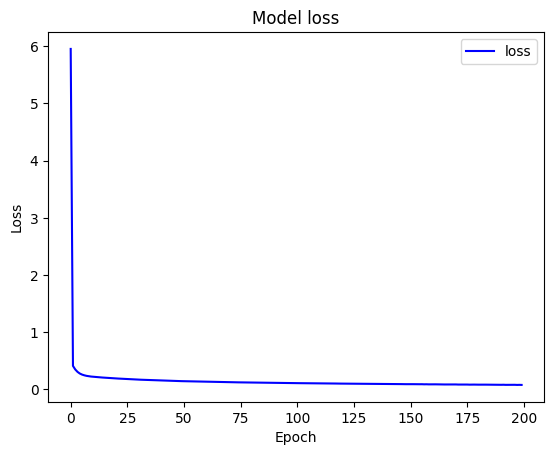

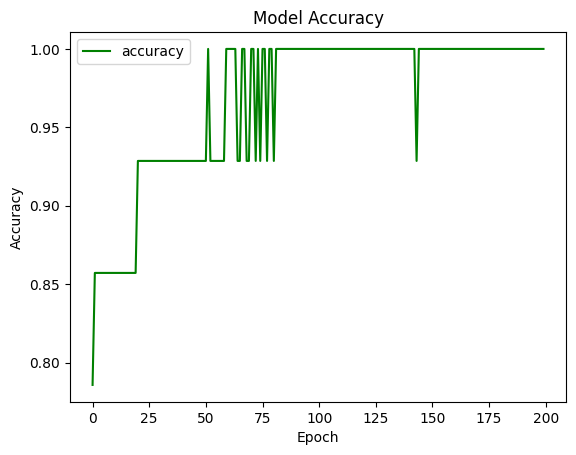

5/5 - 0s - loss: 0.0465 - binary_accuracy: 1.0000 - 27ms/epoch - 5ms/step
188/188 [==============================] - 0s 1ms/step


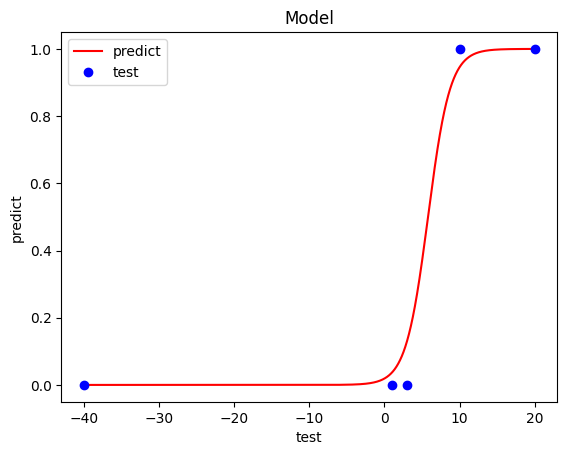

1/1 [==============================] - 0s 68ms/step
[[0.03686988]
 [0.07025693]
 [0.12980255]
 [0.2274684 ]
 [0.29263106]]
1/1 [==============================] - 0s 74ms/step
[[0.9717401 ]
 [0.99996763]
 [0.99999994]
 [1.        ]
 [1.        ]]


In [2]:
# 단순한 로지스틱 회귀 예제 (텐서플로우2)
# https://byunghyun23.tistory.com/44
# 학습목표 : 10 미만의 값은 0, 10 이상은 1로 분류

import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split

# x(입력), y(결과) 데이터
x_train = np.array([-50, -40, -30, -20, -10, -5, 0, 5, 10, 20, 30, 40, 50,
                    -15, 1, 3, -7, 2.5,
                    7, 77, 33, 52, 80])
y_train = np.array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
                    0, 0, 0, 0, 0,
                    1, 1, 1, 1, 1])

# train 데이터와 test 데이터로 분리 (80:20)
x_train, x_test, y_train, y_test = train_test_split(x_train, y_train, test_size=0.2, random_state=77)

# keras의 다차원 계층 모델인 Sequential를 레이어를 만든다.
model = tf.keras.models.Sequential()
# 입력이 1차원이고 출력이 1차원임을 뜻함 - Dense는 레이어의 종류
model.add(tf.keras.layers.Dense(5, input_dim=1))
model.add(tf.keras.layers.Dense(3))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# 종합
model.summary()

# Optimizer: Stochastic gradient descent (확률적 경사 하강법)
sgd = tf.keras.optimizers.SGD(learning_rate=0.01)

# Loss function: binary_crossentropy (이진 교차 엔트로피)
model.compile(optimizer=sgd, loss='binary_crossentropy', metrics=['binary_accuracy'])

# 주어진 X와 y데이터에 대해서 오차를 최소화하는 작업을 200번 시도합니다.
hist = model.fit(x_train, y_train, batch_size=1, epochs=200, validation_split=0.2, verbose=0)

# 모델 손실 함수 시각화
plt.plot(hist.history['loss'], 'b-', label='loss')
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# 모델 정확도 시각화
plt.plot(hist.history['binary_accuracy'], 'g-', label='accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# 손실 함수 계산
model.evaluate(x_test, y_test, batch_size=1, verbose=2)

# 모델 시각화
line_x = np.arange(min(x_test), max(x_test), 0.01)
line_y = model.predict(line_x)

plt.plot(line_x, line_y, 'r-')
plt.plot(x_test, y_test, 'bo')
plt.title('Model')
plt.xlabel('test')
plt.ylabel('predict')
plt.legend(['predict', 'test'], loc='upper left')
plt.show()

# 모델 테스트
print(model.predict([1, 2, 3, 4, 4.5]))
print(model.predict([11, 21, 31, 41, 500]))